# Classical Spherical NFW model

The classical spherical NFW mass model has a mass density profile given by

\begin{equation}
    \rho(r) = \frac{\rho_s}{(r/r_s)(1 +  r/r_s )^2} = \frac{\kappa_s \Sigma_{crit}}{r(1 + r/r_s)^2 },
\end{equation}
with $\Sigma_{crit} = \frac{c^2}{4\pi G} \frac{D_l}{D_l D_{ls}}$  and $\kappa_s = \frac{\rho_s r_s}{\Sigma_{crit}}$.


The deflection angle, derivative by the projected mass density is:
\begin{equation}
    \alpha(R) = 4\kappa_s \frac{g(R)}{R}, 
\end{equation}
where

\begin{equation}
  g(R) =  \begin{cases}
    \ln(\frac{R}{2}) + \frac{1}{\sqrt{1 - R^2}} \text{arctanh}\left(\sqrt{1 - R^2}\right) & \text{if $R < 1$},\\
    1 + \ln(\frac{1}{2}) & \text{if $R = 1$}, \\
    \ln(\frac{R}{2}) + \frac{1}{\sqrt{R^2 - 1}} \text{arctan}\left(\sqrt{R^2 - 1}\right) & \text{if $R > 1$}.
  \end{cases}
\end{equation}

Here, $R = \xi/r_s = \sqrt{x^2 + y^2}/r_s$ is a dimensionless radius in the plane of sky, and $(x,y)$ are cartesian coordinates in this plane.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sNFW(grid, r_s, kappa_s):
    
    R = np.sqrt(  grid[:,1]**2 + grid[:,0]**2  )/r_s
    g_ = np.empty_like(R)
    
    r = R[R > 1]
    g_[R > 1] =  np.log( r * 0.5 ) + ( 1/( np.sqrt( r**2 - 1 ) ) ) * np.arctan( np.sqrt( r**2 - 1 ) )
    
    r = R[R == 1]
    g_[R == 1] =  1 + np.log(0.5)
    
    r = R[R < 1]
    g_[R < 1] =  np.log( r * 0.5 ) + ( 1/( np.sqrt( 1 - r**2 ) ) ) * np.arctanh( np.sqrt( 1 - r**2 ) )                           
    
    theta = np.arctan2(grid[:,0],grid[:,1])
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)
    radial_deflection = ( 4 * kappa_s * r_s * g_ )/R
    
    return radial_deflection * sin_theta,  radial_deflection * cos_theta

In [4]:
#We want to compare our result against Pyautolens, so here we load the previous result by Pyautolens
grid   =  np.loadtxt("AutolensGrid.txt")
Result = np.loadtxt("AutolensResult.txt")

In [5]:
#Attention to same values used in Pyautolens
result = sNFW(grid, kappa_s=0.01, r_s=10)

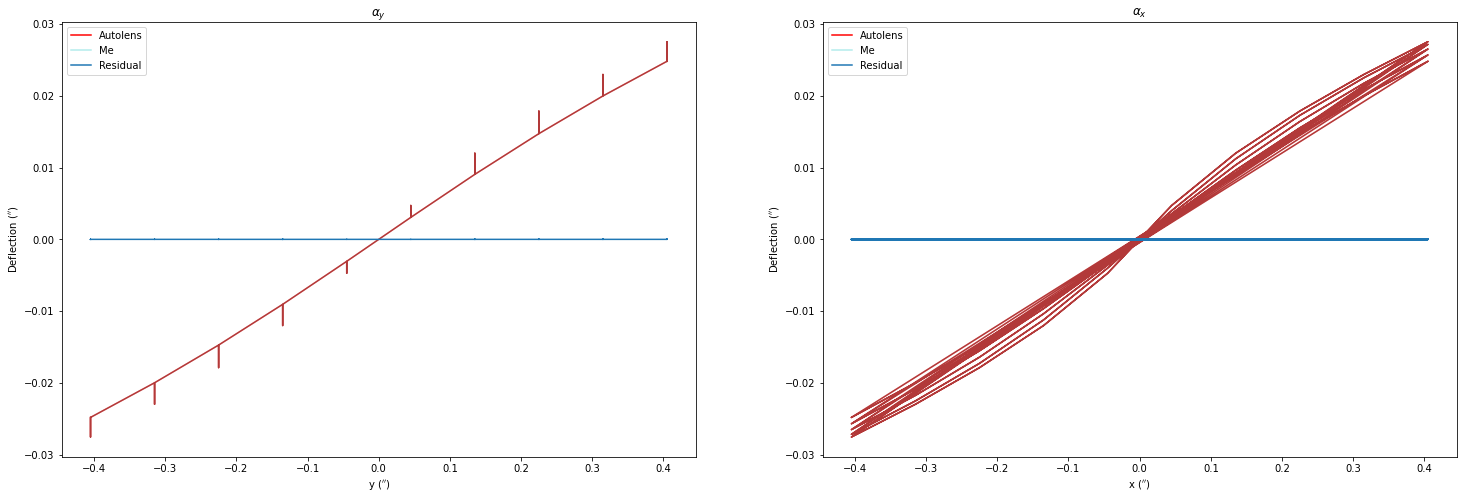

In [6]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.title("$\\alpha_y$")
plt.plot(grid[:,0],Result[:,0], "r", label="Autolens")
plt.plot(grid[:,0],result[0], "c", label="Me", alpha=0.3)
plt.plot(grid[:,0],Result[:,0]-result[0], label="Residual")


plt.xlabel("y ($''$)")
plt.ylabel("Deflection ($''$)")
plt.legend()


plt.subplot(122)
plt.title("$\\alpha_x$")
plt.plot(grid[:,1],Result[:,1], "r", label="Autolens")
plt.plot(grid[:,1],result[1], "c", label="Me", alpha=0.3)
plt.plot(grid[:,1],Result[:,1]-result[1], label="Residual")
plt.xlabel("x ($''$)")
plt.ylabel("Deflection ($''$)")
plt.legend()


